# Section 2.4 — Calculus prerequisites

This notebook contains all the code examples from [Section 2.4 Calculus prerequisites]() of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:

- Math definitions
- Sets
- Functions
- Integrals as area calculations
- Numerical integration using the `scipy.integrate` functions `quad` and `trapz`
- Symbolic integration using the `sympy` function `integrate`
- Bonus calculus topics
  - Limits
  - Derivatives
  - Fundamental theorem of calculus

## Calculus prerequisites

(see formulas and definitions in the book)

### Sets


In [8]:
S = {1, 2, 3}
T = {3, 4, 5, 6}

print("S ∪ T =", S.union(T))
print("S ∩ T =", S.intersection(T))
print("S \ T =", S.difference(T))

S ∪ T = {1, 2, 3, 4, 5, 6}
S ∩ T = {3}
S \ T = {1, 2}


### Functions

In Python, we define functions using the `def` keyword.

For example, the code cell below defines the function $g(x)=x$,
then evaluate it for the input $x=4$.

In [9]:
# define the function g that takes input x
def g(x):
    return x

# calling the function g on input x=4
g(4)

4

#### Plotting the graph of the function $g(x)$

The graph of the function $g(x)$ is obtained by plotting a line that passes through the set of input-output coordinate pairs $(x, g(x))$.

<AxesSubplot:>

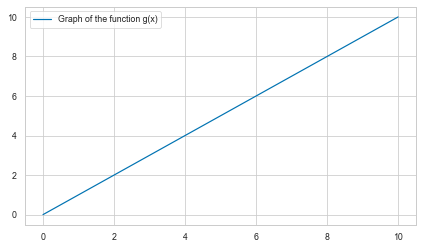

In [10]:
import numpy as np
import seaborn as sns

xs = np.linspace(0, 10, 100)
gxs = g(xs)

sns.lineplot(x=xs, y=gxs, label="Graph of the function g(x)")

The function `linspace(0,10,100)` creates an array of `100` points in the interval $[0,10]$.
We store this sequence of inputs into the variable `xs`.
Next, we computer the output value $y = g(x)$ for each of the inputs in the array `xs`,
and store the result in the array `gxs`.
Finally, we use the function `sns.lineplot()` to generate the plot.

In [11]:
import numpy as np

np.sqrt(4)

2.0

In [12]:
np.log(4)

1.3862943611198906

Examples of function-followed-by-inverse-function calculations:

In [13]:
np.sqrt(4)**2

4.0

In [14]:
np.exp(np.log(4))

4.0

### Computing integrals geometrically


See Figure 2.15 in the book that shows the integral under $f(x) = 3$ between $a=0$ and $b=5$.



See also Figure 2.16 that shows the integral under $g(x) = x$ between $a=0$ and $b=5$.


### Computing integrals numerically using SciPy `integrate` methods

There are numerous ways to compute integrals in Python. 
Computing integrals "numerically" means we're splitting the region of integration into thousands or millions of sub-regions, computing the areas of these sub-regions, and adding up the result.

We'll now show some examples using two of the functions form the module `sympy.integrate`:
- `quad(f,a,b)`: high-level function for computing areas (quadratures)
- `trapz(ys,xs)`: low-level function for computing integral using trapezoid approximation



We'll start with the `quad` function.

In [15]:
from scipy.integrate import quad

In [16]:
# define the constant function f(x) = c
def f(x):
    c = 3
    return c

# call the funtion f with input x=333
f(333)

3

In [17]:
quad(f, 0, 5)

(15.0, 1.6653345369377348e-13)

The function `quad` returns two numbers as output: the value of the integral and a precision parameter.
In output of the code, tells us the value of the integral is $\int_0^5 3 dx$ is `15.0` and guarantees the accuracy of this value up to an error of $10^{-13}$.

Since we're usually only interested in the value of the integral, we often select the first output of `quad` so you'll see the code like `quad(...)[0]` in all the code examples below.

In [18]:
quad(f, 0, 5)[0]

15.0

In [19]:
# define the function g(x) = x (line with slope 1)
def g(x):
    return x

# call the funtion g with input x=10
g(10)

10

In [20]:
quad(g, 0, 5)[0]

12.5

#### Trapezoid approximation

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs $x$ and outputs $g(x)$ of the function,
then pass it to `trapz` so it carries out the calculation.

In [21]:
from scipy.integrate import trapz

In [22]:
m = 1000
xs = np.linspace(0, 5, m)
gxs = g(xs)

trapz(gxs, xs)

12.5

### Computing integrals symbolically using SymPy `integrate`

In [23]:
from sympy import symbols

# define symbolic variables
x, a, b, c = symbols('x a b c')

The `symbols` function creates SymPy symbolic variables.
Unlike ordinary Python variables that hold a particular value,
SymPy variables act as placeholders that can take on any value.

We can use the symbolic variables to create expressions,
just like we do with math variables in pen-and-paper calculations.

#### Constant function $f(x)=c$

In [24]:
fx = c
fx

c

We'll use the SymPy function `integrate` for computing integrals.
We call this function
by passing in the expression we want to integrate as the first argument.
The second argument is a triple $(x,a,b)$,
which specifies the variable of integration $x$,
the lower limit of integration $a$,
and the upper limit of integration $b$.

In [25]:
from sympy import integrate

integrate(fx, (x,a,b))  # = A_f(a,b)

-a*c + b*c

The answer $c\cdot (b-a)$ is the general expression for calculating the area under $f(x)=c$,
for between any starting point $x=a$ and end point $x=b$.
Geometrically, this is just a height-times-width formula for the area of a rectangle.

To compute the specific integral between $a=0$ and $b=5$ under $f(x)=3$,
we use the `subs` (substitute) method,
passing in a Python dictionary of the values we want to "plug" into the general expression.

In [26]:
integrate(fx, (x,a,b)).subs({c:3, a:0, b:5})

15

The integral function $F_0(b) = \int_0^b f(x) dx$ is obtained as follows.

In [27]:
integrate(fx, (x,0,b))  # = F_0(b)

b*c

#### Line $g(x)=x$

In [28]:
gx = 1*x
gx

x

In [29]:
integrate(gx, (x,a,b))  # = A_g(a,b)

-a**2/2 + b**2/2

In [30]:
integrate(gx, (x,a,b))

-a**2/2 + b**2/2

In [31]:
integrate(gx, (x,a,b)).subs({a:0, b:5})

25/2

In [32]:
integrate(gx, (x,a,b)).subs({m:3, a:0, b:5}).evalf()

12.5000000000000

Bonus: the integral function $G_0(b) = \int_0^b g(x) dx$ is obtained as follows.

In [33]:
integrate(gx, (x,0,b))  # = G_0(b)

b**2/2

### Theoretical calculus topics




In [67]:
from sympy import symbols

x, a, b, i, m, n = symbols("x a b i m n")
x

x

Let's create a simple expression using the symbols.

In [68]:
expr = b + m*x
expr

b + m*x

Let's look how SymPy represents this expression under the hood.

In [69]:
from sympy import srepr

srepr(expr)

"Add(Symbol('b'), Mul(Symbol('m'), Symbol('x')))"

#### Limits


In [70]:
from sympy import limit, exp, oo

limit(exp(x)/x**100, x, oo) 

oo

In [71]:
# # EXAMPLE 2: ... consider segtment of length (b-a) cut into n parts
# delta = (b - a)/n

# zero length...
# limit(delta, n, oo)

# but still add up to whole interval...
# summation(delta, (i, 0, n-1))

#### Derivatives


The derivative function of $f(x) = mx +b$ is $f'(x)=m$.

In [72]:
from sympy import diff

f = b + m*x

diff(f, x)

m

The derivative function of $f(x) = \frac{c}{2}x^2$ is $f'(x)=cx$.

In [73]:
f = c/2 * x**2

diff(f, x)

c*x

Here is another example of a complicated-looking function,
that includes an exponential, a trigonometric, and a logarithmic function.

In [74]:
from sympy import log, exp, sin
f = exp(x) + sin(x) + log(x)
f

exp(x) + log(x) + sin(x)

In [75]:
diff(f)

exp(x) + cos(x) + 1/x

#### Optimization algorithms

See [wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) for the description of the gradient descent algorithm.

The code below implements a simplified version in one dimension, so we call it derivative descent.

In [76]:
def derivative_descent(f, x0=0, alpha=0.01, tol=1e-11):
    """
    Computes the minimum of SymPy expression `f` using
    the gradient descent algorithm in one dimension.
    """
    x_i = x0
    delta = float("inf")
    while delta > tol:
        df_at_x_i = diff(f, x).subs({x:x_i})
        x_next = x_i - alpha*df_at_x_i
        delta = abs(x_next - x_i)
        x_i = x_next
    return x_i

Let's find the minimum value of the function $f(x) = (x-5)^2$ using the `derivative_descent` algorithm.

In [77]:
f = (x-5)**2

argmin_f = derivative_descent(f)
argmin_f

4.99999999951256

The solution is roughly accurate to roughly `tol`*10 = `1e-10`  decimals.

In [78]:
float(argmin_f - 5)

-4.874394221587863e-10

#### Using SciPy optimization functions

Let's solve the same optimization problem using the function `minimize` from `scipy.optimize`.

In [79]:
from scipy.optimize import minimize

def f(x):
    return (x-5)**2

res = minimize(f, x0=0)

res["x"][0]  # = argmin f(x)

4.99999997455944

#### Riemann sums

See this [excerpt](https://minireference.com/static/excerpts/noBSmathphys_v5_preview.pdf#page=114) for a definition of the Riemann sum.

#### Fundamental theorem of calculus


In [80]:
from sympy import diff, integrate, log, exp, sin

f = log(x) + exp(x) + sin(x)

In [81]:
F = integrate(f)
F

x*log(x) - x + exp(x) - cos(x)

In [82]:
diff(F)

exp(x) + log(x) + sin(x)

In [83]:
diff(integrate(f)) == f

True

In [84]:
integrate(diff(f)) == f

True